# High dimensional data analysis

We will go over several examples today, where an unstructured data set of more than 2 variables is given to you, without any knowledge of the structure nor the way the data set was collected.

## Example 1: 10 dimensions - 1 Ouput problem
This data set consists of 10 dimensions and you have 100 samples in the 10dimensional space (X1). For each of the 100 samples, an output is measured (Y1). 

Let's assume that the inputs are all measurements of properties of a type of chemical, and the output is a measured grade of the chemical (ranging from 0 - 3).

In [2]:
#Import all packages we will need:
import seaborn as sns
import pandas as pd
from pylab import *
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition
#end of importing packages

#Creation of data test set:
X1, Y1 = make_blobs(n_features=10,  n_samples=100, centers=4, random_state=4,cluster_std=2)


**Whithout knowing anything about the data, what can you do with this data set??? **

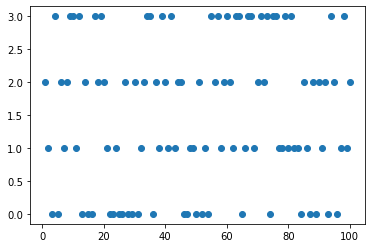

In [3]:
#Plot the output, to see variability in it:
scatter(linspace(1,100,100),Y1)
show()

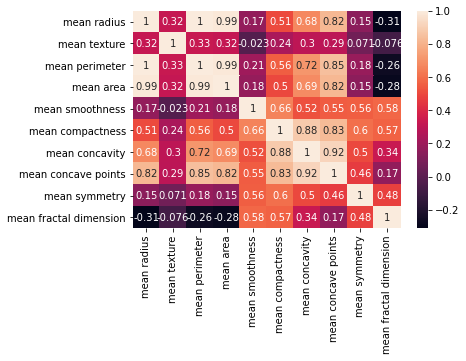

In [9]:
#look at correlation matrix: Are inputs correlated??
#Example tutorial reproduced from: https://likegeeks.com/python-correlation-matrix/
from sklearn.datasets import load_breast_cancer
import pandas as pd
breast_cancer=load_breast_cancer()
bcdata= breast_cancer.data

features = breast_cancer.feature_names
df = pd.DataFrame(bcdata, columns = features)

#take only 10 features because data set is too large:
corr_mat = df.iloc[:,:10].corr()
sns.heatmap(corr_mat, annot = True)

show()

**What are your observations from this data set???**



### Can PCA help?

#### PCA reminders: 
- We start with a 10-dimensional space, and we want to project it to a lower dimensional space. <br><br>
- We find these new dimensions by finding the new linear combination of a vector (new dimension or Principal component), that has the maximum variance. <br><br>
- The first PC is the direction that has the largest variance, if we project the data onto it. <br>
- The second PC is the direction that maximizes the variance among all directions orthogonal to the first PC. <br><br>

#### Why is PCA helpful?
One way to learn more information about the data is to try to reduce it's dimensionality. <br>
1. This helps us visualize it better. <br><br>
2. This helps us identify correlations in the inputs. <br><br>
3. Both of above really help us with interpreting the data. <br><br>


[0.41594854 0.3391866  0.1600729  0.02016822 0.01640516]


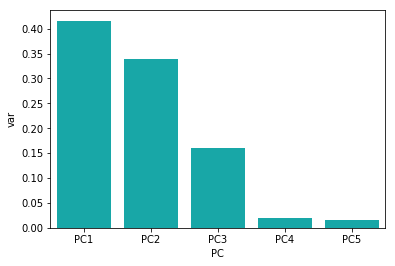

In [67]:
#create a PCA structure, with up to 5 Principal Components:
pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(X1)

#Create a DataFrame variable to pass on to 
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pc_df['Grade'] = Y1
pc_df.head()

#Create a DataFrame variable with information about the explained variance:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5']})

print(pca.explained_variance_ratio_)

#Create a bar plot of explained variance:
sns.barplot(x='PC',y="var", data=df, color="c");

### Conclusions of PCA analysis so far:
1. First Principal component explained more than 40% of the variance in the data. <br><br>
2. First and Second Components together explained 74% of the Variance in the data <br><br>
3. First three components explained: 90% of the variance in the data! <br><br>

### Plotting with respect to new basis-dimensions or PCs:

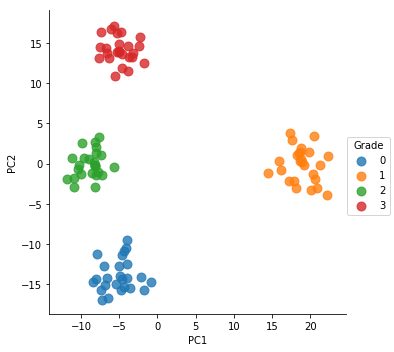

In [68]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Grade', # color by value of grade of chemical       
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
show()


### Interpretation of plotting in PC-space:
- This plot is called a **Score Plot** <br><br>
- Usually the first two PCs explain a lot of variance in data, thus they can be used to identify clusters or outliers. <br><br>
- If there are no clusters or outliers, the score plot will be randomly distributed points around 0 (assuming the data is scaled originally). <br><br>

- Think of example of camera and pendulum-> all we're doing is finding "new directions". <br><br>
- PC1 and PC2 are orthogonal vectors, that is why we can plot them like a regular plot. <br><br>
- PC1 and PC2 are just different dimensions, but they are really like variables. <br><br>
- Plotting in PC space helps us actually identify clusters in our data (important for visualization). <br><br>

- What happens if I plot the next two components??? <br>

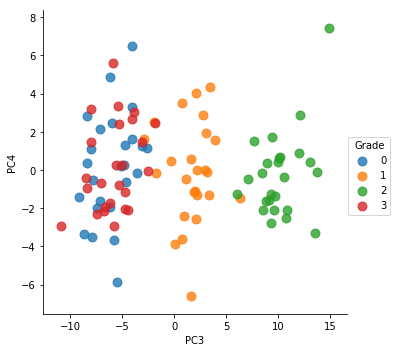

In [69]:
sns.lmplot( x="PC3", y="PC4",
  data=pc_df, 
  fit_reg=False, 
  hue='Grade', # color by value of grade of chemical       
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
show()

#### How many PC's should we keep?
3 PC!


[0.41594854 0.3391866  0.1600729 ]


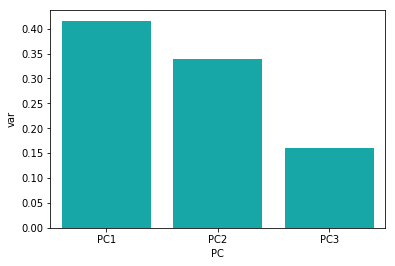

In [70]:
# Fit new model with decided number of PCs.
#create a PCA structure, with up to 3 Principal Components:
pca = decomposition.PCA(n_components=3)
pc = pca.fit_transform(X1)

#Create a DataFrame variable to pass on to 
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2','PC3'])
pc_df['Grade'] = Y1
pc_df.head()

#Create a DataFrame variable with information about the explained variance:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3']})

print(pca.explained_variance_ratio_)

#Create a bar plot of explained variance:
sns.barplot(x='PC',y="var", data=df, color="c");

#### PCA loadings or eigenvectors:
- As we discussed, the PCs are linear combination vectors of our original X1. <br><br>
- $PC1 = w_1*x_1 + w_2*x_2 + ... + w_{10}*x_{10} $ <br><br>
- What do these $w$ values tell us??? <br><br>


In [71]:
loadings = pca.components_
print(loadings)

[[ 0.13461409 -0.4992262   0.0507498   0.27972213 -0.0743094   0.30049564
  -0.52474074  0.13037259 -0.35802346  0.36807888]
 [-0.28550164  0.28994195 -0.33164476 -0.45431669 -0.39858662  0.20812215
  -0.30796374  0.43805038  0.0981688   0.13956197]
 [-0.35289278  0.13294741  0.05740339  0.61719362 -0.35171357 -0.27034974
  -0.31556813 -0.12673132  0.39998818 -0.0338011 ]]


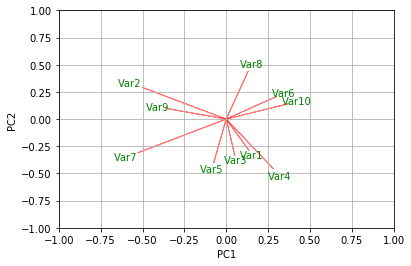

In [72]:
## Custom - made plotting to plot loadings 

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley, c = Y1)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pc[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [65]:
loadings = pca.components_
print(loadings)

[[ 0.13461409 -0.4992262   0.0507498   0.27972213 -0.0743094   0.30049564
  -0.52474074  0.13037259 -0.35802346  0.36807888]
 [-0.28550164  0.28994195 -0.33164476 -0.45431669 -0.39858662  0.20812215
  -0.30796374  0.43805038  0.0981688   0.13956197]
 [-0.35289278  0.13294741  0.05740339  0.61719362 -0.35171357 -0.27034974
  -0.31556813 -0.12673132  0.39998818 -0.0338011 ]]
